In [ ]:
# Nalla

# 06/12/2020

#The data is exclusively imbalanced so applied sampling techniques to create a balance between positive and negative classes.
#The data is split into training and test data and applied several ML algorithms to calaculate the AUC. When tested on the
#test data the model was overfitting. Used gridsearchCV to find the best parameters for the ML algorithm, after finding the 
#best parameters, performed hyper parameter tuning to further incresase in the AUC of the model on the test data.

#The best AUC was achieved by XGBoost


# AUC:0.845

### Import libraries

In [1115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

### Read the data from the computer

#### I am building my model on the train data that is given in the question.

#### later this train data is split into train and test

#### train is used to build the model and test is used to test the results obtained on the train data.

#### 'test' data given in the question is not used any where in the data, it is directly used in the end to predict the outcomes with the best model achieved by training the train data.

#### I am mentioning clearly because, I dont want to confuse with train and test terms in the process of building model

In [1117]:
data = pd.read_csv(r'C:\Users\vinee\OneDrive\Desktop\Fulltime\Resume_2020\BlueOwl\DS_ML\train.csv')

In [1118]:
data.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,56,0.005737,iPhone,M,0,62717,2,1,4,0
1,50,0.004733,desktop,F,0,64328,2,3,2,0
2,54,0.004129,laptop,M,0,83439,1,3,7,0
3,16,0.005117,Android,F,0,30110,2,3,0,0
4,37,0.003635,desktop,M,0,76565,2,1,5,0


#### Understanding the data types 

In [8]:
data.dtypes

age                             int64
cost_of_ad                    float64
device_type                    object
gender                         object
in_initial_launch_location      int64
income                          int64
n_drivers                       int64
n_vehicles                      int64
prior_ins_tenure                int64
outcome                         int64
dtype: object

#### Checking the null values in the data.

#### from the below we can observe that there are 269 null vaues in the gender column

In [9]:
data.isnull().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        269
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
outcome                         0
dtype: int64

#### Replacing the null values with mode

In [1119]:
data['gender'].value_counts()

F    4970
M    4761
Name: gender, dtype: int64

In [1120]:
data['gender'].mode()

0    F
dtype: object

In [1121]:
def var(x):
    v = x.fillna('F', inplace = True)
    return v

In [1122]:
var(data['gender'])

#### From the below we can clearly see that the null values have been replaced

In [1123]:
data.isnull().sum()

age                           0
cost_of_ad                    0
device_type                   0
gender                        0
in_initial_launch_location    0
income                        0
n_drivers                     0
n_vehicles                    0
prior_ins_tenure              0
outcome                       0
dtype: int64

#### Observing the counts of values in the 'outcome' column.

#### Clearly from the below cell, we can infer that the data is imblanced.

#### Imbalanced data might cause overfitting or underfitting in the model.

In [1125]:
#imbalanced data
data['outcome'].value_counts()

0    9018
1     982
Name: outcome, dtype: int64

#### Visualizing the outcome variable.

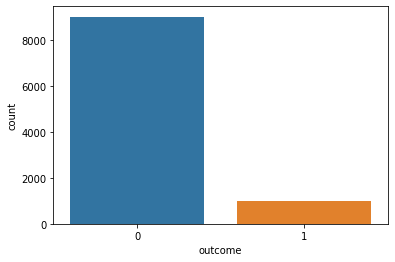

In [1126]:
sns.countplot(data['outcome'])

#### From the below box plot, we can observe that the median price for outcome '0' is greater than the median price for outcome '1'.

#### cost_of_ad is an important feature to add in the model.

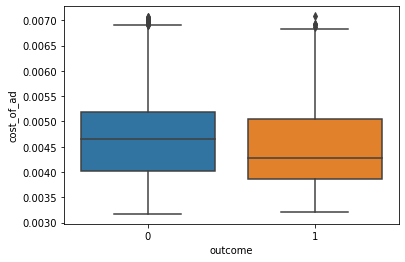

In [1127]:
sns.boxplot(x=data['outcome'], y = data['cost_of_ad'])

#### From the below bar plot, in the desktop device and android, the outcome '1' has more count than the rest of the devices, where as in the rest of the devices the outcome '0' has more counts

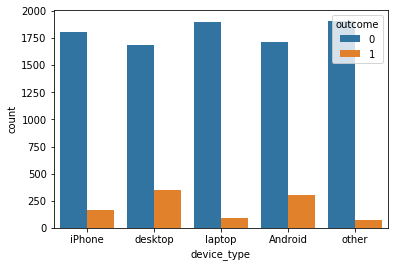

In [1131]:
sns.countplot(x = data['device_type'], hue = data['outcome'])

#### From the below boxplot, there is no difference between outcome '0' income and outcome '1' income.

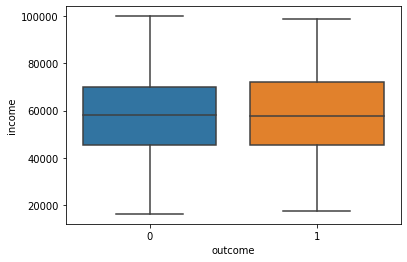

In [1132]:
sns.boxplot(x=data['outcome'], y = data['income'])

#### From the below graph, the no of vehicles required for different outcomes is totally opposite.

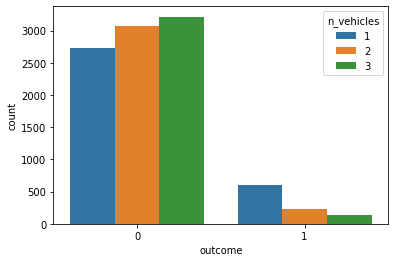

In [1137]:
sns.countplot(x=data['outcome'],hue = data['n_vehicles'])

In [17]:
data.columns

Index(['age', 'cost_of_ad', 'device_type', 'gender',
       'in_initial_launch_location', 'income', 'n_drivers', 'n_vehicles',
       'prior_ins_tenure', 'outcome'],
      dtype='object')

#### Copying the input varibales into x and output varibles into y

In [18]:
x = data.drop(['outcome'],axis = 1)

In [19]:
x.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,56,0.005737,iPhone,M,0,62717,2,1,4
1,50,0.004733,desktop,F,0,64328,2,3,2
2,54,0.004129,laptop,M,0,83439,1,3,7
3,16,0.005117,Android,F,0,30110,2,3,0
4,37,0.003635,desktop,M,0,76565,2,1,5


In [20]:
y = data['outcome']

In [21]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: outcome, dtype: int64

#### This is a binary classification problem, we have to convert all the categorical columns into dummy variables. This means, it creates seperate column for each category and represents 1 for that category and zero for rest of the category in that particular column.

#### For example if I have three categories in my category column like, categoty_ column = {'Android', 'desktop', 'iphone'}

#### Then by creating dummies we get category_column_Android = {1,0,0}, category_column_Desktop = {0,1,0}, category_column_iphone = {0,0,1}.

#### In the below cell we have created dummies for the categorical columns in the x dataset.

#### The categorical columns in our dataset were device_type and gender

In [22]:
x = pd.get_dummies(x)

#### By using get dummies we could be able to get extra columns for the categorical colums

In [23]:
x.head()

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
0,56,0.005737,0,62717,2,1,4,0,0,1,0,0,0,1
1,50,0.004733,0,64328,2,3,2,0,1,0,0,0,1,0
2,54,0.004129,0,83439,1,3,7,0,0,0,1,0,0,1
3,16,0.005117,0,30110,2,3,0,1,0,0,0,0,1,0
4,37,0.003635,0,76565,2,1,5,0,1,0,0,0,0,1


#### Importing the sklearn libraries to build a ML model.

In [1141]:
from sklearn import preprocessing

In [1142]:
from sklearn.model_selection import train_test_split

#### Split the data into training and test data. Training data is 80% of the data and test data is 20% of the data.

#### Training data is used to train and validate the results, where as test is used only once to test our model.

In [1143]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [1144]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold

from sklearn.model_selection import cross_val_score

In [1145]:
kf = KFold(n_splits=5, random_state=42, shuffle=False)

C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [1146]:
from sklearn.metrics import roc_curve, auc

In [1147]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='roc_auc',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
      pred = fitted_model.predict_proba(X_test_data)
    else:
      pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

#### Applying Random Forest Classifier with a various parameters and passing through gridsearchCV to calculate the best parameters.

#### Here we are using 5 folds, that is train data is split into 5 parts in the gridsearch algorithm trained on the 4 folds and validates on the leftover fold.

#### Best score computed here in gridsearchcv is a mean score of all the splits, and the parameters achieved for this particular score is the best parameters

In [1148]:
model = RandomForestClassifier()
param_grid = {
    'n_estimators': [400, 700, 1000],
    'max_depth': [15,20,25],
    'max_leaf_nodes': [50, 100, 200]
}

model, pred = algorithm_pipeline(x_train, x_test, y_train, y_test, model, 
                                 param_grid, cv=5, scoring_fit='roc_auc')

print(model.best_score_)
print(model.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   34.0s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:  2.7min finished


0.8446375097427327
{'max_depth': 15, 'max_leaf_nodes': 200, 'n_estimators': 700}


In [1149]:
model = RandomForestClassifier(max_depth = 15, max_leaf_nodes = 200, n_estimators = 700, random_state=0)

#### Fitting the Random Forest Classifier with the best parameters achieved in gridsearchCV

In [1150]:
model.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, max_leaf_nodes=200, n_estimators=700,
                       random_state=0)

#### Perfroming kfold cross validation for the best parameters

In [1151]:
kf = KFold(n_splits=5, random_state=42, shuffle=False)

C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [1152]:
cross_val_score(model, x_train, y_train, cv=kf, scoring='roc_auc').mean()

0.8440375406620854

#### Predicting the outcome on the test data with the random forest classifier using the best parameters achieved in the gridsearch

In [1153]:
y_pred1 = model.predict(x_test)

#### Calculating the AUC between the predicted outcomes and the test data

In [1154]:
rf_fpr1, rf_tpr1, threshold = roc_curve(y_test, y_pred1)

In [1155]:
auc_rf1 = auc(rf_fpr1,rf_tpr1)

#### From the below cell, the calculated AUC is 0.57 on the test data, but we got 0.844 on the train data that means the model is overfitting.

#### Because this is a imbalanced data the model is overfitting. The best method to get rid of overfitting in the model is to perfom sampling techniques.

In [1157]:
auc_rf1

0.5760175660787281

#### Visualizing the AUC 

<function matplotlib.pyplot.show(*args, **kw)>

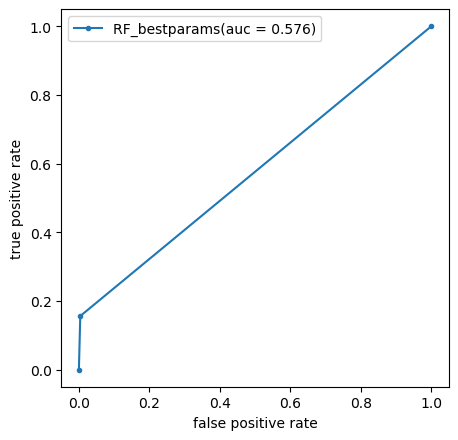

In [1158]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(rf_fpr1, rf_tpr1, marker = '.', label = 'RF_bestparams(auc = %0.3f)' % auc_rf1)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show

#### Importing the sklearn libraries for sampling

#### Basically we can do oversampling or undersampling

#### Here I am performing oversampling i.e increasing the class of minority class

In [1165]:
from sklearn.pipeline import Pipeline, make_pipeline

In [1166]:
from imblearn.pipeline import Pipeline, make_pipeline

In [1167]:
from imblearn import under_sampling, over_sampling

In [1168]:
from imblearn.over_sampling import SMOTE

#### From the below cell, you can clearly observe that the counts of label '1' and label '0' are same after oversampling.Before they were not same.

#### Now the data is balanced we can again apply algorithm to calculate the AUC.

In [1170]:
sm = SMOTE(random_state = 2) 

X_train_res, y_train_res = sm.fit_sample(x_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_res == 0))) 

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

After OverSampling, the shape of train_X: (14472, 14)
After OverSampling, the shape of train_y: (14472,) 

After OverSampling, counts of label '1': 7236
After OverSampling, counts of label '0': 7236 

Before OverSampling, counts of label '1': 764
Before OverSampling, counts of label '0': 7236 



C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### I am using pipeline because in pipeline sampling, applying algorithm and cross validation takes in a single step

#### Here the crossvalidation used is gridsearchCV for the best parameters

In [1171]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), RandomForestClassifier())

In [1172]:
params = {
    'n_estimators': [400, 700, 1000],
    'max_depth': [15,20,25],
    'max_leaf_nodes': [50, 100, 200]
}

In [1173]:
new_params = {'randomforestclassifier__' + key: params[key] for key in params}
grid_imba = GridSearchCV(imba_pipeline, param_grid=new_params, cv=kf, scoring='roc_auc',
                        return_train_score=False)

In [1174]:
grid_imba.fit(x_train, y_train)

C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, cate

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             param_grid={'randomforestclassifier__max_depth': [15, 20, 25],
                         'randomforestclassifier__max_leaf_nodes': [50, 100,
                                                                    200],
                         'randomforestclassifier__n_estimators': [400, 700,
                                                                  1000]},
             scoring='roc_auc')

#### best score for the above sampling method with a Random Forest Classifier as an estimator.

In [1175]:
grid_imba.best_score_

0.849423021031036

#### best parameters for the above sampling method with a random forest classifier as an estimator

In [1176]:
grid_imba.best_params_

{'randomforestclassifier__max_depth': 25,
 'randomforestclassifier__max_leaf_nodes': 100,
 'randomforestclassifier__n_estimators': 1000}

#### Taking the best parameters obtained from the above gridsearchcv algorithm and fitting in the random forest classifier to calcuate the test AUC

In [1177]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), RandomForestClassifier(n_estimators = 1000, max_depth = 25, max_leaf_nodes = 100))

In [1178]:
imba_pipeline.fit(x_train,y_train)

C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=25, max_leaf_nodes=100,
                                        n_estimators=1000))])

In [1179]:
cross_val_score(imba_pipeline, x_train, y_train, scoring='roc_auc', cv=5).mean()

C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, cate

0.8486390060475884

In [1180]:
y_pred2 = imba_pipeline.predict(x_test)

In [1181]:
rf_fpr2, rf_tpr2, threshold = roc_curve(y_test, y_pred2)

In [1182]:
auc_rf2 = auc(rf_fpr2,rf_tpr2)

#### Calculated AUC after oversampling with random forest estimator

In [1183]:
auc_rf2

0.6239999382201217

<function matplotlib.pyplot.show(*args, **kw)>

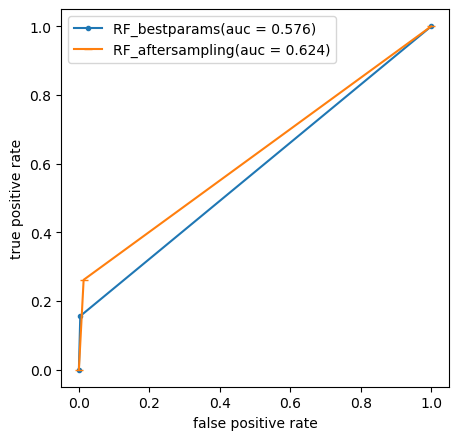

In [1186]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(rf_fpr1, rf_tpr1, marker = '.', label = 'RF_bestparams(auc = %0.3f)' % auc_rf1)
plt.plot(rf_fpr2, rf_tpr2, marker = '_', label = 'RF_aftersampling(auc = %0.3f)' % auc_rf2)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show

#### The model is still overfitting even after oversampling.

#### The best advice is to change the algortithm. Next I would like to try with boosting algorithms which performs better than the bagging algorithms. Earlier Random Forest was a bagging algorithm.

#### Bagging and Boosting decrease the variance of your single estimate as they combine several estimates from different models. So the result may be a model with higher stability. However, Boosting could generate a combined model with lower errors as it optimises the advantages and reduces pitfalls of the single model.

#### Next applying Gradient Boosting algorithm and repeat the same process

In [1190]:
from sklearn.ensemble import GradientBoostingClassifier

In [1191]:
imba_pipeline = make_pipeline(SMOTE(random_state=42), GradientBoostingClassifier())

In [1192]:
param_grid = {
    'n_estimators': [400, 700, 1000],
    'max_depth':[5,10,15],
    'min_samples_split':[400, 700, 1000]
}

In [1193]:
new_params_gb = {'gradientboostingclassifier__' + key: param_grid[key] for key in param_grid}
grid_imba_gb = GridSearchCV(imba_pipeline, param_grid=new_params_gb, cv=kf, scoring='roc_auc',
                        return_train_score=False)

In [1194]:
grid_imba_gb.fit(x_train, y_train)

C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, cate

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('gradientboostingclassifier',
                                        GradientBoostingClassifier())]),
             param_grid={'gradientboostingclassifier__max_depth': [5, 10, 15],
                         'gradientboostingclassifier__min_samples_split': [400,
                                                                           700,
                                                                           1000],
                         'gradientboostingclassifier__n_estimators': [400, 700,
                                                                      1000]},
             scoring='roc_auc')

#### calculating the best params and best score obtained from the gridsearchcv by using gradient boosting classifier as an estimator.

In [1197]:
grid_imba_gb.best_score_

0.8326770752043968

In [1198]:
grid_imba_gb.best_params_

{'gradientboostingclassifier__max_depth': 5,
 'gradientboostingclassifier__min_samples_split': 1000,
 'gradientboostingclassifier__n_estimators': 400}

#### Fitting the gradient boosting classifier with the best parameters obtained from the above gridsearchcv

In [1199]:
gb_imba_pipeline = make_pipeline(SMOTE(random_state=42), GradientBoostingClassifier(n_estimators = 1000,
                                                                                    max_depth = 9, 
                                                                                    min_samples_split = 1200,
                                                                                    learning_rate=0.01,
                                                                                    subsample=0.8,
                                                                                    max_features=3,
                                                                                    min_samples_leaf=60,
                                                                                    random_state=10
                                                                                   ))

In [1200]:
gb_imba_pipeline.fit(x_train,y_train)

C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('gradientboostingclassifier',
                 GradientBoostingClassifier(learning_rate=0.01, max_depth=9,
                                            max_features=3, min_samples_leaf=60,
                                            min_samples_split=1200,
                                            n_estimators=1000, random_state=10,
                                            subsample=0.8))])

In [1201]:
cross_val_score(gb_imba_pipeline, x_train, y_train, scoring='roc_auc', cv=5).mean()

C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, cate

0.8547891847555885

In [1202]:
y_pred_gb = gb_imba_pipeline.predict(x_test)

In [1203]:
y_pred_gb

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [1204]:
gb_fpr, gb_tpr, threshold = roc_curve(y_test, y_pred_gb)

In [1225]:
auc_gb = auc(gb_fpr, gb_tpr)

#### Calculated AUC for gradient boosting

In [1226]:
auc_gb

0.6363095789701294

<function matplotlib.pyplot.show(*args, **kw)>

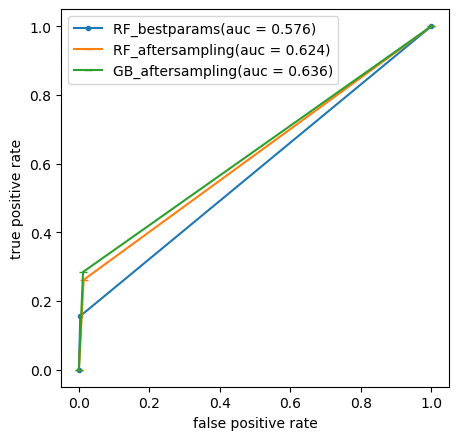

In [1227]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(rf_fpr1, rf_tpr1, marker = '.', label = 'RF_bestparams(auc = %0.3f)' % auc_rf1)
plt.plot(rf_fpr2, rf_tpr2, marker = '_', label = 'RF_aftersampling(auc = %0.3f)' % auc_rf2)
plt.plot(gb_fpr, gb_tpr, marker = '_', label = 'GB_aftersampling(auc = %0.3f)' % auc_gb)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show

#### Still the model is overfitting, we can try with xtreme gradient descent algorithm to overcome the overfitting in the model.

#### The process is same, passing through the pipeline, oversampling the data, applying xgboost and passing through gridsearchcv to compute the best parameters.

In [1208]:
import xgboost as xgb

In [1209]:
from sklearn.preprocessing import StandardScaler

#### Import standard scaler becuase we have to normalize the input data, by normalizing the input data the every value in the input data is between zero and one.

In [1210]:
scaler = StandardScaler()

In [1211]:
scaler_fit = scaler.fit(x_train)

#### Transform the x_train and x_test values between zero and one

In [1212]:
x_train = scaler_fit.transform(x_train)

In [1213]:
x_test = scaler_fit.transform(x_test)

#### Applying xgboost with a different parameters

In [36]:
xgb_imba_pipeline = make_pipeline(SMOTE(random_state=42), xgb.XGBClassifier())

In [37]:
param_grid = {
    'n_estimators': [400, 700, 1000],
    'colsample_bytree': [0.7, 0.8],
    'max_depth': [15,20,25]
}

In [40]:
new_params_xgb = {'xgbclassifier__' + key: param_grid[key] for key in param_grid}
grid_imba_xgb = GridSearchCV(xgb_imba_pipeline, param_grid=new_params_xgb, cv=kf, scoring='roc_auc',
                        return_train_score=False)

In [41]:
grid_imba_xgb.fit(x_train,y_train)

C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, cate

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=False),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('xgbclassifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      gamma=None, gpu_id=None,
                                                      importance_type='gain',
                                                      interaction_constraints=None,
                                                      learning_rate=None,
                                                      max_de...
                                                    

#### calculating the best params and best score obtained from the gridsearchcv by using xgboost as an estimator.

In [1214]:
grid_imba_xgb.best_score_

0.8052709645211641

In [1215]:
grid_imba_xgb.best_params_

{'xgbclassifier__colsample_bytree': 0.7,
 'xgbclassifier__max_depth': 20,
 'xgbclassifier__n_estimators': 400}

#### Fitting the xgboost with the best parameters obtained from the gridsearchcv after oversampling.

#### In xgboost there are several parameters that should be tuned carefully inorder to increase the AUC of the model.

#### learning_rate typically takes values 0.001, 0.01,0.1,1,10.

#### subsample takes values between 0 to 1.

#### max_features is sqrt of total no of features.

#### alpha and lambda is for L1 and L2 regularization.

#### Here the hyper parameter tuning is done iteratively for each parameter.

#### objective is binary because it is a classification problem and has two outcome values.

#### Note: The reason being I didn't include all the intutive parameters in the gridsearchCV because, it was taking lot of time to process on my computer.

In [1216]:
xgb_imba_pipeline = make_pipeline(SMOTE(random_state=42), xgb.XGBClassifier(n_estimators = 400,
                                                                            max_depth = 20, 
                                                                            learning_rate= 0.001,
                                                                            subsample=0.9,
                                                                            gamma = 0.0,
                                                                            max_features=3,
                                                                            reg_alpha = 0.5,
                                                                            reg_lambda = 1.3,
                                                                            colsample_bytree = 0.8,
                                                                            min_child_weight=7,
                                                                            scale_pos_weight = 1.3,
                                                                            objective= 'binary:logistic',
                                                                            nthread=4,
                                                                            max_delta_step = 10,
                                                                            booster = 'gbtree',
                                                                            base_score = 0.5,
                                                                            colsample_bylevel=0.3,
                                                                            colsample_bynode =1,
                                                                            gpu_id = 0
                                                                            ))

In [1217]:
xgb_imba_pipeline.fit(x_train,y_train)

C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Pipeline(steps=[('smote', SMOTE(random_state=42)),
                ('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=0.3, colsample_bynode=1,
                               colsample_bytree=0.8, gamma=0.0, gpu_id=0,
                               importance_type='gain',
                               interaction_constraints=None,
                               learning_rate=0.001, max_delta_step=10,
                               max_depth=20, max_features=3, min_child_weight=7,
                               missing=nan, monotone_constraints=None,
                               n_estimators=400, n_jobs=4, nthread=4,
                               num_parallel_tree=1, random_state=0,
                               reg_alpha=0.5, reg_lambda=1.3,
                               scale_pos_weight=1.3, subsample=0.9,
                               tree_method=None, validate_parameters=False,
                   

In [1218]:
cross_val_score(xgb_imba_pipeline, x_train, y_train, scoring='roc_auc', cv=5).mean()

C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\vinee\Anaconda5\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, cate

0.8454261291259126

#### Predicting the x_test values using xgboost with best parameters obtained from gridsearchCV after sampling.

In [1219]:
y_pred_xgb = xgb_imba_pipeline.predict(x_test)

In [1247]:
y_pred_xgb

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

In [1221]:
xgb_fpr, xgb_tpr, threshold = roc_curve(y_test, y_pred_xgb)

In [1222]:
auc_xgb  = auc(xgb_fpr, xgb_tpr)

#### Calculated AUC for xgboost after hyper parameter tuning

In [1223]:
auc_xgb

0.7573003222850317

Text(0.5, 1.0, 'Area under the curve for all models')

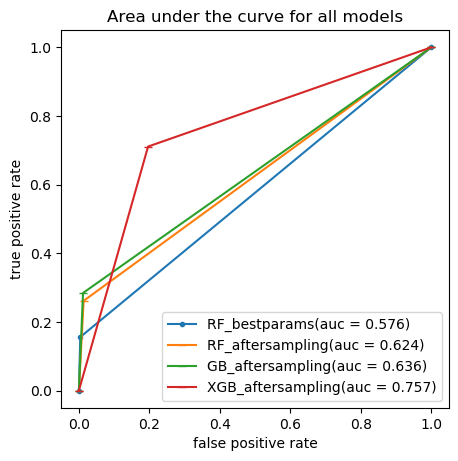

In [1231]:
plt.figure(figsize=(5,5),dpi=100)
plt.plot(rf_fpr1, rf_tpr1, marker = '.', label = 'RF_bestparams(auc = %0.3f)' % auc_rf1)
plt.plot(rf_fpr2, rf_tpr2, marker = '_', label = 'RF_aftersampling(auc = %0.3f)' % auc_rf2)
plt.plot(gb_fpr, gb_tpr, marker = '_', label = 'GB_aftersampling(auc = %0.3f)' % auc_gb)
plt.plot(xgb_fpr, xgb_tpr, marker = '_', label = 'XGB_aftersampling(auc = %0.3f)' % auc_xgb)
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend()
plt.show
plt.title('Area under the curve for all models')

#### Conclusion.

#### Since the model is extremely overfitted, I had to apply several algorithms and perfrom various iterations for hyper parameter tuning to improve the AUC of the model.

#### Initially normal Random Forest model is built, the model was overfitting with the train score and test score.{train  score: 0.844, test score: 0.576}

#### Applied oversampling techniques to balance both the classes.

#### After oversampling again applied Random Forest to see the improvement in the score, but here there is not much difference.{train score: 0.848, test score: 0.62}

#### Switched the algorithm from bagging to boosting techniques.

#### Applied gradient boosting algorithm to improve the AUC of the model but again the model was overfitting.{train score:0.854, test score: 0.634}

#### Finally applied xgboost and performed hyperparameter tuning iteratively for each parameter to get the best AUC for the model. In the end xgboost gave the best AUC and with a less differnece in the training and test score, here training score is 0.845 and test score is 0.757 and the differnece is 0.06 which is very very less compared to remaining models

#### In the end, I would suggest to consider xgboost model score for the evaluation.

#### Although I know I didn't reach the expected test score that is mentioned in the question, but I could be able to build my model very close to the mentioned test score i.e train score = 0.845 and test score is 0.757, the difference of my test score and test score mentioned in the question is 0.06.

#### Please feel free to give me feed back if you are about to reject my candidacy, and let me know how can I further leverage the AUC as you expected. I am open to learn new methods and improve my knowledge.

#### By using XGBoost I have predicted the values in the test dataset that is given in the question.

#### Read the test data from the computer

In [1270]:
test = pd.read_csv(r'C:\Users\vinee\OneDrive\Desktop\Fulltime\Resume_2020\BlueOwl\DS_ML\test.csv')

In [1271]:
test.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure
0,34,0.005134,Android,F,1,40376,1,3,7
1,53,0.005223,desktop,F,1,84511,1,1,11
2,46,0.004939,laptop,F,0,79322,1,1,4
3,36,0.004924,Android,F,0,63295,1,2,0
4,28,0.005146,other,F,1,36170,1,3,3


In [1272]:
test.isnull().sum()

age                             0
cost_of_ad                      0
device_type                     0
gender                        249
in_initial_launch_location      0
income                          0
n_drivers                       0
n_vehicles                      0
prior_ins_tenure                0
dtype: int64

#### Replacing the null values in the gender column

In [1273]:
test['gender'].value_counts()

F    4906
M    4845
Name: gender, dtype: int64

In [1274]:
def var(x):
    v = x.fillna('F', inplace = True)
    return v

In [1275]:
var(test['gender'])

In [1276]:
test1 = pd.get_dummies(test)
test1.head()

,age,cost_of_ad,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,device_type_Android,device_type_desktop,device_type_iPhone,device_type_laptop,device_type_other,gender_F,gender_M
0,34,0.005134,1,40376,1,3,7,1,0,0,0,0,1,0
1,53,0.005223,1,84511,1,1,11,0,1,0,0,0,1,0
2,46,0.004939,0,79322,1,1,4,0,0,0,1,0,1,0
3,36,0.004924,0,63295,1,2,0,1,0,0,0,0,1,0
4,28,0.005146,1,36170,1,3,3,0,0,0,0,1,1,0


In [1277]:
test1 = scaler_fit.transform(test1)

#### Below I am using xgb boost model to predict

In [1278]:
y_test_pred_xgb = xgb_imba_pipeline.predict(test1)

In [1291]:
y_test_pred_xgb

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [1280]:
(unique, counts) = np.unique(y_test_pred_xgb, return_counts=True)

In [1281]:
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[   0 7497]
 [   1 2503]]


#### Creating a new data frame for the y_test_pred_xgb

In [1282]:
e_dataframe = pd.DataFrame(y_test_pred_xgb)

In [1285]:
e_dataframe.head()

,0
0,0
1,1
2,0
3,0
4,0


#### Renaming the column name to outcome and the dataframe to df_new

In [1286]:
df_new = e_dataframe.rename(columns={0: 'outcome'})

In [1287]:
df_new.head()

,outcome
0,0
1,1
2,0
3,0
4,0


#### Creating a new column 'outcome' in the test dataset and inserting the y_test_pred_xgb values or df_new['outcome'] in the outcome variable

In [1288]:
test['outcome'] = df_new['outcome']

#### Finally test dataset with the 'outcome' variable as a predictions is created

#### Below test.head() displays the first five rows of the test dataset.

In [1289]:
test.head()

,age,cost_of_ad,device_type,gender,in_initial_launch_location,income,n_drivers,n_vehicles,prior_ins_tenure,outcome
0,34,0.005134,Android,F,1,40376,1,3,7,0
1,53,0.005223,desktop,F,1,84511,1,1,11,1
2,46,0.004939,laptop,F,0,79322,1,1,4,0
3,36,0.004924,Android,F,0,63295,1,2,0,0
4,28,0.005146,other,F,1,36170,1,3,3,0
